In [13]:
import numpy as np
from numpy import pi
from qiskit import *
from qiskit import ClassicalRegister, QuantumRegister
import matplotlib.pyplot as plt
from qiskit.circuit.library import U1Gate,U3Gate,CU1Gate

#%matplotlib inline


StateVEctor: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


/tmp/ipykernel_203846/2610564777.py:8: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend=simulator_vector).result()


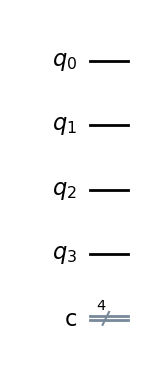

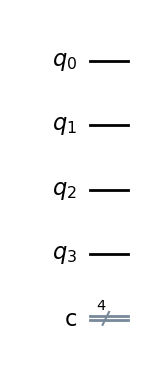

In [14]:
n=4
circuit = QuantumCircuit(n,n)
#circuit.measure_all()

%matplotlib inline

simulator_vector = Aer.get_backend("statevector_simulator")
result = execute(circuit, backend=simulator_vector).result()
statevector = result.get_statevector(circuit)
print("StateVEctor:",statevector)

simulator2 = Aer.get_backend("unitary_simulator")

simulator3 = Aer.get_backend("qasm_simulator")





circuit.draw(output='mpl')

In [15]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    for i in range (n):
        circuit.h(i)
        m = 1
        for j in range (i+1,n):
            m = m +1; 
            cu1=CU1Gate(-2*pi/2**m)
            circuit.append(cu1,[i,j])
            
            #circuit.cu1(-2*pi/2**(m), i, j)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit


def makeQFTgate(N):
    """returns a gate of centred QFT, swaps qubits"""
    temp = QuantumCircuit (N)
    swap_registers(temp, N)
    qft_rotations(temp,N)
    #temp.x(n-1);
    QFTC = temp.to_gate()
    QFTC.name = "QFT_" + str(N) 
    return QFTC



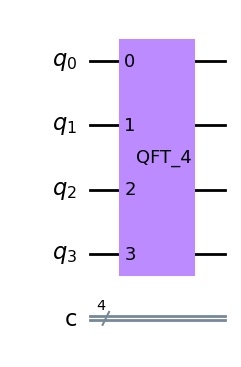

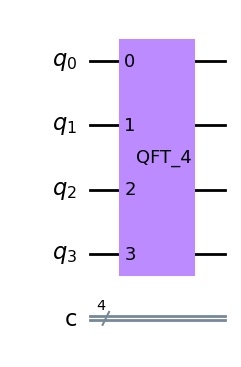

In [16]:
QFT = makeQFTgate(n)
circuit.append(QFT,list(range(n)))

circuit.draw(output='mpl')

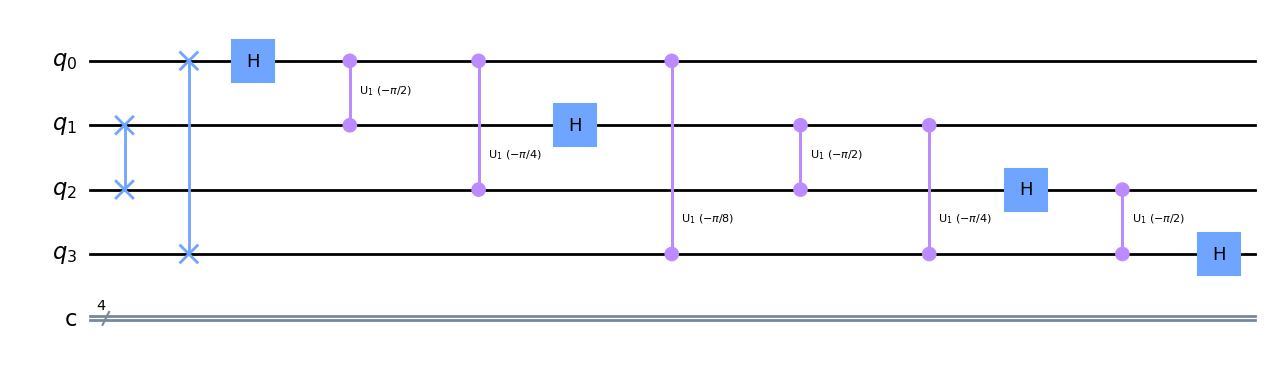

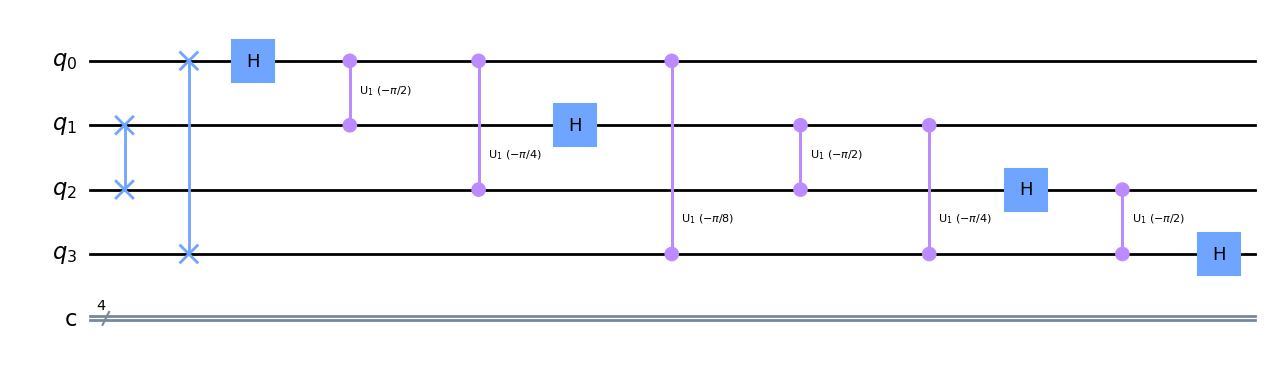

In [17]:
circuit.decompose().draw('mpl')
